In [1]:
DEBUG=False

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from nn_wrapper import NeuralNetworkWrapper
import numpy as np
from sklearn.metrics import accuracy_score

# Importing and cleaning MNIST dataset

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
#one hot encoding
y_ohc = np.zeros((y.size, int(np.max(y))+1))
y_ohc[np.arange(y.size),y.astype(np.int)] = 1
y = y_ohc

if DEBUG:
    X = X[:1000, :]
    y = y[:1000, :]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Training neural network

Loss after 1 epochs: 2.016
Loss after 2 epochs: 1.574
Loss after 3 epochs: 1.291
Loss after 4 epochs: 1.095
Loss after 5 epochs: 0.952
Loss after 6 epochs: 0.844
Loss after 7 epochs: 0.761
Loss after 8 epochs: 0.694
Loss after 9 epochs: 0.640
Loss after 10 epochs: 0.594
Loss after 11 epochs: 0.555
Loss after 12 epochs: 0.521
Loss after 13 epochs: 0.492
Loss after 14 epochs: 0.466
Loss after 15 epochs: 0.443
Loss after 16 epochs: 0.423
Loss after 17 epochs: 0.405
Loss after 18 epochs: 0.389
Loss after 19 epochs: 0.375
Loss after 20 epochs: 0.362
Loss after 21 epochs: 0.351
Loss after 22 epochs: 0.340
Loss after 23 epochs: 0.330
Loss after 24 epochs: 0.321
Loss after 25 epochs: 0.313
Final loss: 0.313


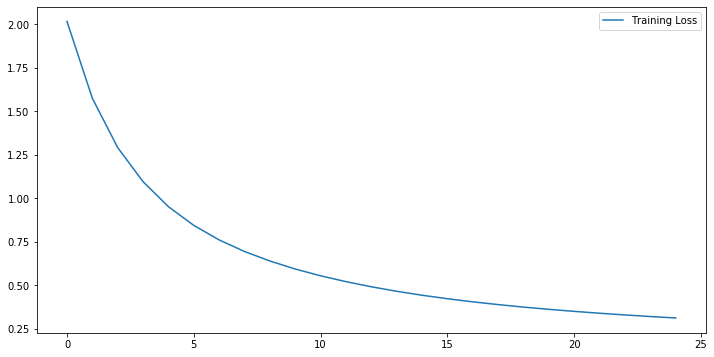

Accuracy on test set: 0.9036428571428572


In [6]:
NN = NeuralNetworkWrapper(784,
                          [50, 20, 20, 10],
                          ['relu', 'relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.005,
                          500)

NN.train(X_train, y_train, 25, 0)
NN.plot_loss()

y_hat = NN.predict(X_test).T
y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Fit with validation split

Loss after 1 epochs: 1.658
Loss after 2 epochs: 1.162
Loss after 3 epochs: 0.908
Loss after 4 epochs: 0.766
Loss after 5 epochs: 0.675
Loss after 6 epochs: 0.611
Loss after 7 epochs: 0.563
Loss after 8 epochs: 0.525
Loss after 9 epochs: 0.494
Loss after 10 epochs: 0.468
Loss after 11 epochs: 0.446
Loss after 12 epochs: 0.427
Loss after 13 epochs: 0.410
Loss after 14 epochs: 0.395
Loss after 15 epochs: 0.381
Loss after 16 epochs: 0.368
Loss after 17 epochs: 0.357
Loss after 18 epochs: 0.346
Loss after 19 epochs: 0.336
Loss after 20 epochs: 0.327
Loss after 21 epochs: 0.318
Loss after 22 epochs: 0.310
Loss after 23 epochs: 0.302
Loss after 24 epochs: 0.295
Loss after 25 epochs: 0.288
Loss after 26 epochs: 0.282
Loss after 27 epochs: 0.276
Loss after 28 epochs: 0.270
Loss after 29 epochs: 0.265
Loss after 30 epochs: 0.259
Loss after 31 epochs: 0.254
Loss after 32 epochs: 0.250
Loss after 33 epochs: 0.245
Loss after 34 epochs: 0.241
Loss after 35 epochs: 0.237
Loss after 36 epochs: 0.233
L

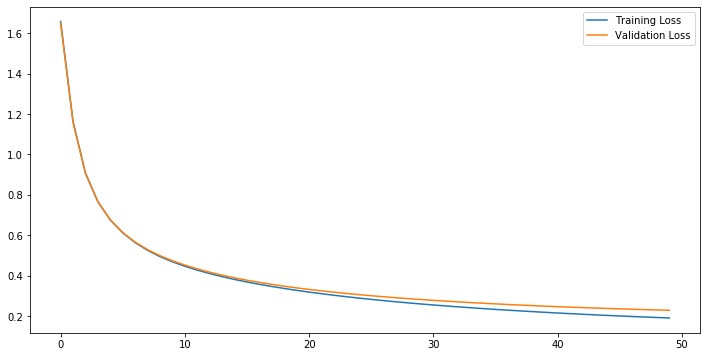

Accuracy on test set: 0.9322857142857143


In [7]:
NN2 = NeuralNetworkWrapper(784,
                          [50, 20, 20, 10],
                          ['relu', 'relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.005,
                          500)
NN2.train(X_train,
          y_train,
          50,
          0.1)
NN2.plot_loss()

y_hat = NN2.predict(X_test).T
y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Fit without bias

Loss after 1 epochs: 1.920
Loss after 2 epochs: 1.498
Loss after 3 epochs: 1.193
Loss after 4 epochs: 0.989
Loss after 5 epochs: 0.833
Loss after 6 epochs: 0.717
Loss after 7 epochs: 0.634
Loss after 8 epochs: 0.575
Loss after 9 epochs: 0.531
Loss after 10 epochs: 0.496
Loss after 11 epochs: 0.468
Loss after 12 epochs: 0.444
Loss after 13 epochs: 0.423
Loss after 14 epochs: 0.406
Loss after 15 epochs: 0.390
Loss after 16 epochs: 0.376
Loss after 17 epochs: 0.364
Loss after 18 epochs: 0.352
Loss after 19 epochs: 0.342
Loss after 20 epochs: 0.333
Loss after 21 epochs: 0.324
Loss after 22 epochs: 0.316
Loss after 23 epochs: 0.309
Loss after 24 epochs: 0.302
Loss after 25 epochs: 0.296
Loss after 26 epochs: 0.290
Loss after 27 epochs: 0.284
Loss after 28 epochs: 0.278
Loss after 29 epochs: 0.273
Loss after 30 epochs: 0.268
Loss after 31 epochs: 0.264
Loss after 32 epochs: 0.259
Loss after 33 epochs: 0.255
Loss after 34 epochs: 0.251
Loss after 35 epochs: 0.247
Loss after 36 epochs: 0.243
L

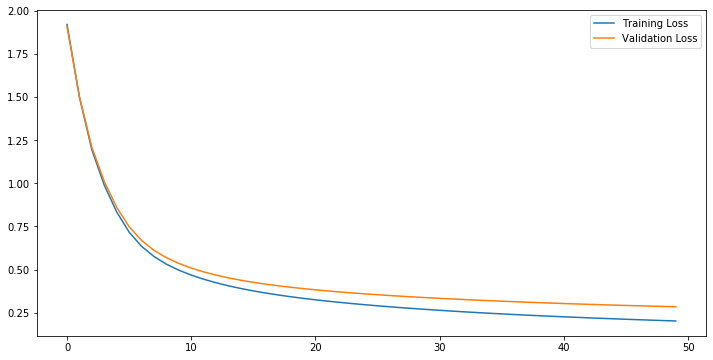

Accuracy on test set: 0.9282857142857143


In [8]:
NN3 = NeuralNetworkWrapper(784,
                          [50, 20, 20, 10],
                          ['relu', 'relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.005,
                          500,
                          bias=False)
NN3.train(X_train,
          y_train,
          50,
          0.1)
NN3.plot_loss()

y_hat = NN3.predict(X_test).T

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')